In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/norm/spectra.h5'
GRID_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/grid/bosz_5000_4/spectra.h5'

SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [4]:
from lv.pca import PCA

In [5]:
with h5py.File(NORM_PATH, 'r') as f:
    flux = f['flux'][()]
    mask = f['flux_idx'][()]
#     Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
#     T_eff = f['T_eff'][()]
    wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]
#     eigs = f['flux_eigs'][()]   

In [ ]:
pL = PCA()

In [136]:
pH = PCA(flux, mask)

3it [01:06, 22.31s/it]


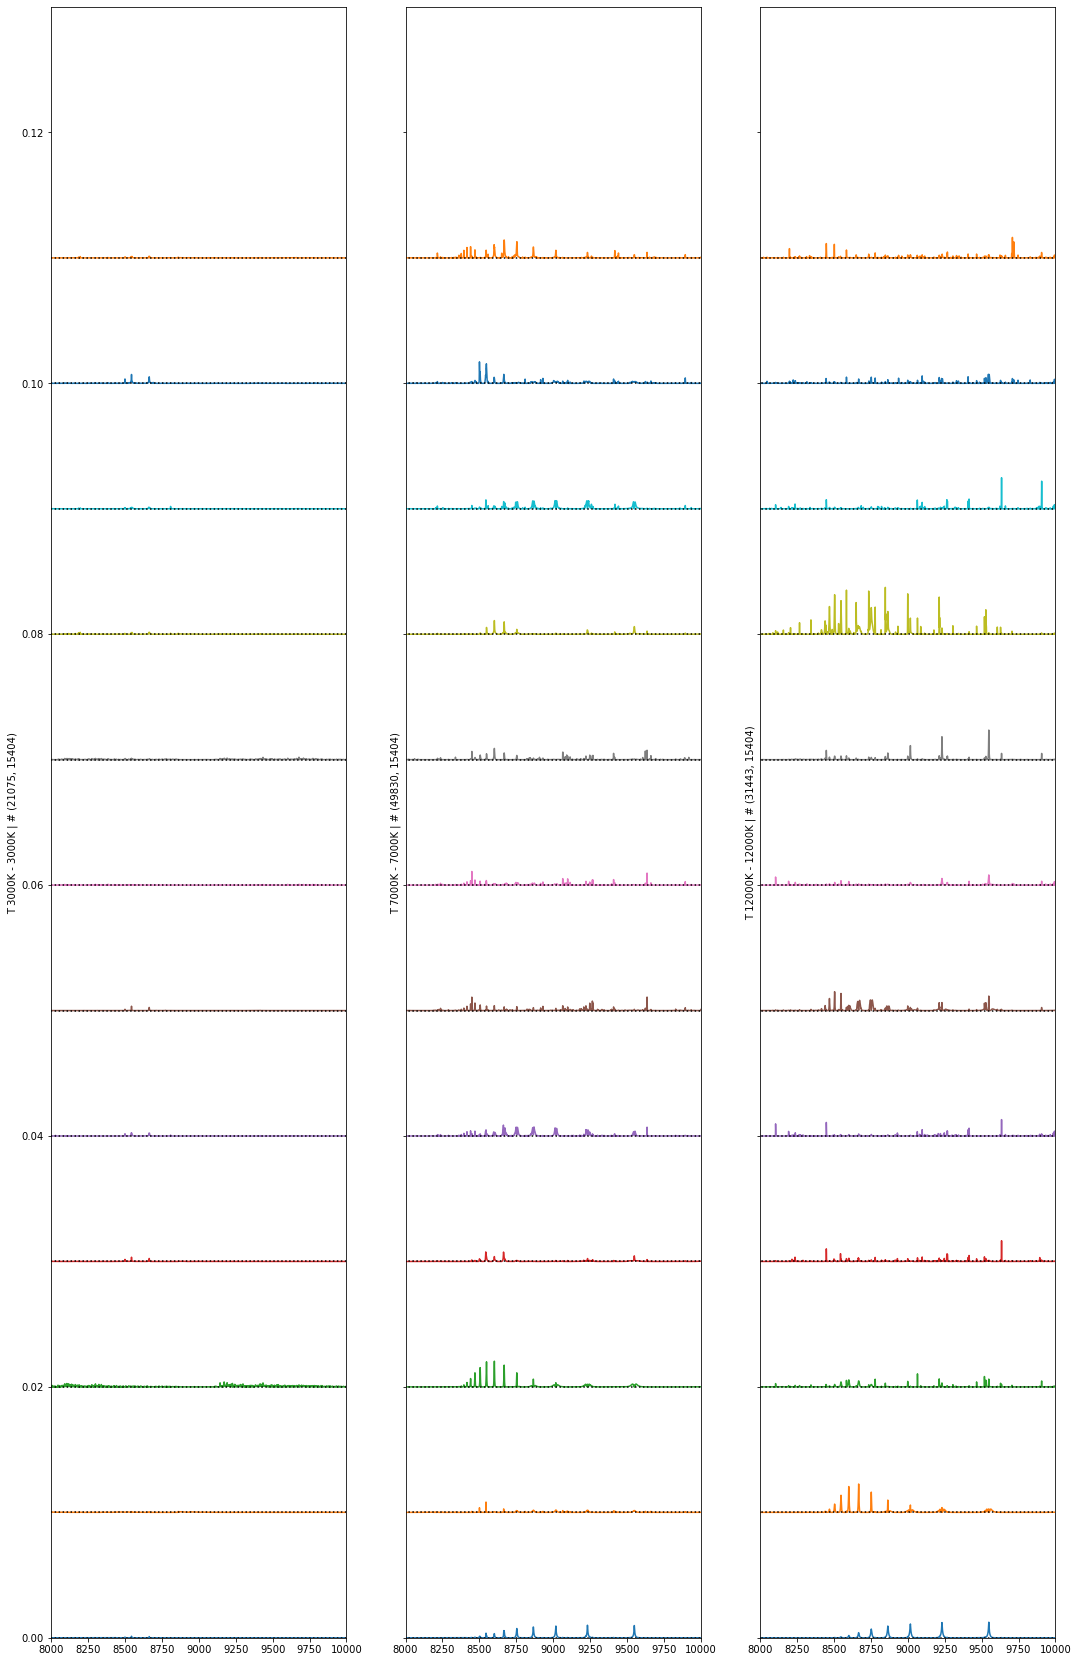

In [137]:
pH.plot_all_vs(step=0.01, lb=8000, ub=10000)

In [138]:
VL = pH.V[0]

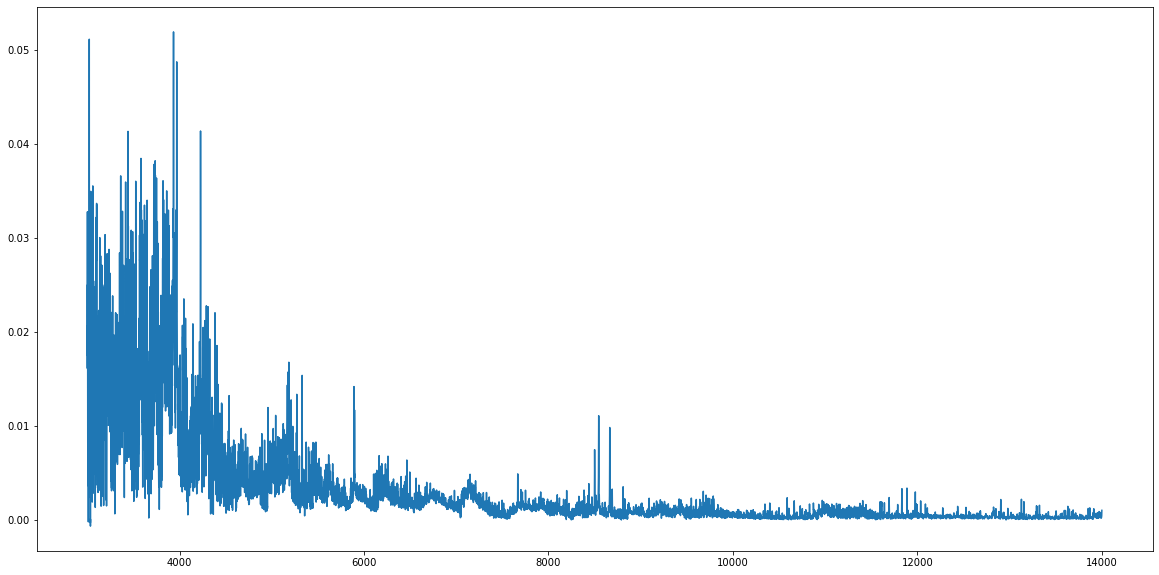

In [139]:
plt.figure(figsize=(20,10))
plt.plot(pH.wave, VL[:,0])

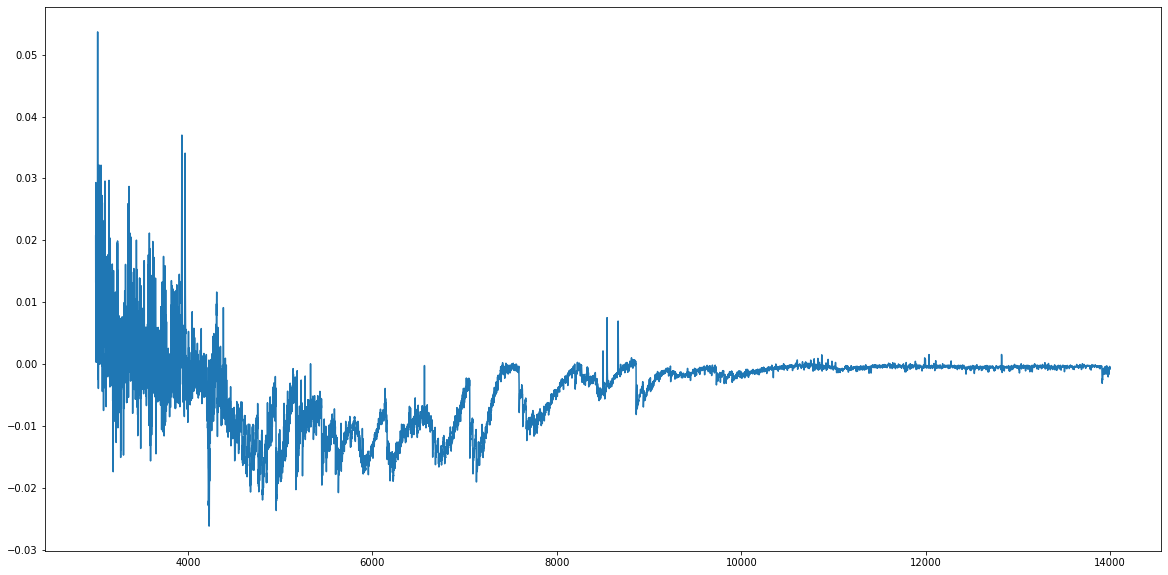

In [140]:
plt.figure(figsize=(20,10))
plt.plot(pH.wave, VL[:,1])

In [128]:
UL = pH.X[0].dot(VL)

ValueError: 'c' argument has 43472 elements, which is inconsistent with 'x' and 'y' with size 33393.

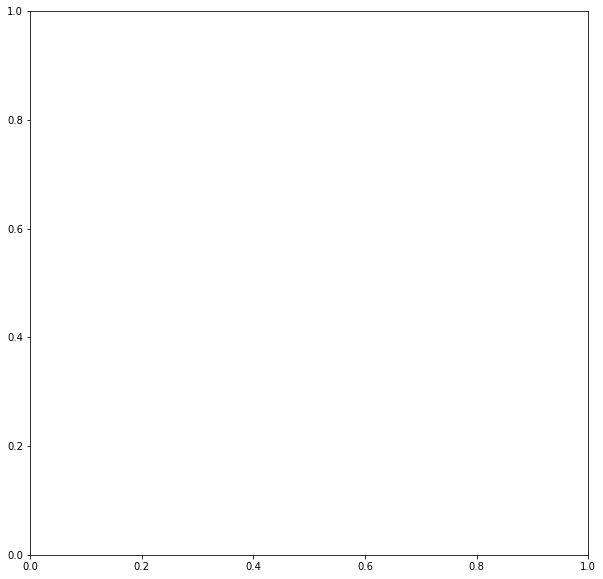

In [129]:
plt.figure(figsize=(10,10))
plt.scatter(UL[:,0], UL[:,1], c=df_paraL["Logg"],)
# plt.scatter(UL[:,0], UL[:,1])
plt.colorbar()

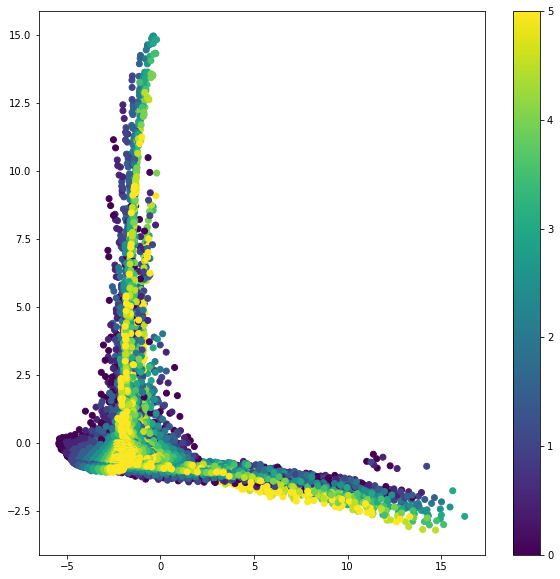

In [119]:
plt.figure(figsize=(10,10))
plt.scatter(UL[:,1], UL[:,2], c=df_paraL["Logg"],)
# plt.scatter(UL[:,0], UL[:,1])
plt.colorbar()

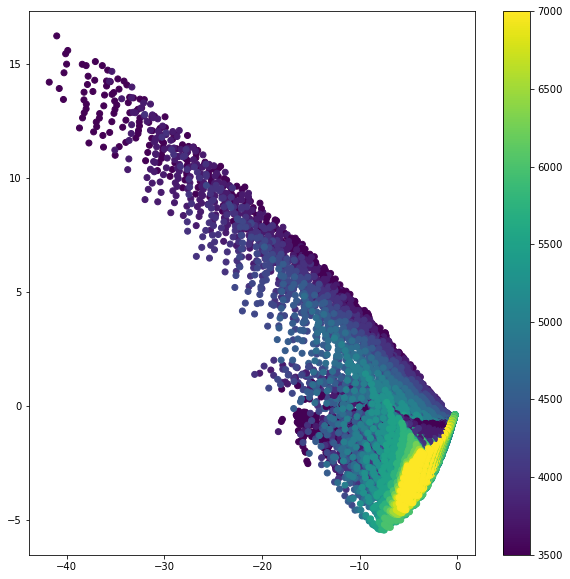

In [121]:
plt.figure(figsize=(10,10))
plt.scatter(UL[:,0], UL[:,1], c=df_paraL["Teff"],)
# plt.scatter(UL[:,0], UL[:,1])
plt.colorbar()

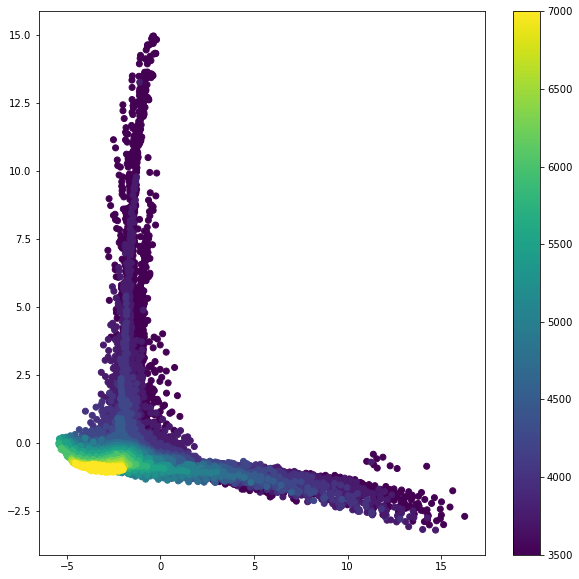

In [120]:
plt.figure(figsize=(10,10))
plt.scatter(UL[:,1], UL[:,2], c=df_paraL["Teff"],)
# plt.scatter(UL[:,0], UL[:,1])
plt.colorbar()

In [27]:
VV = pH.V[2]

In [28]:
VV.shape

(4855, 32)

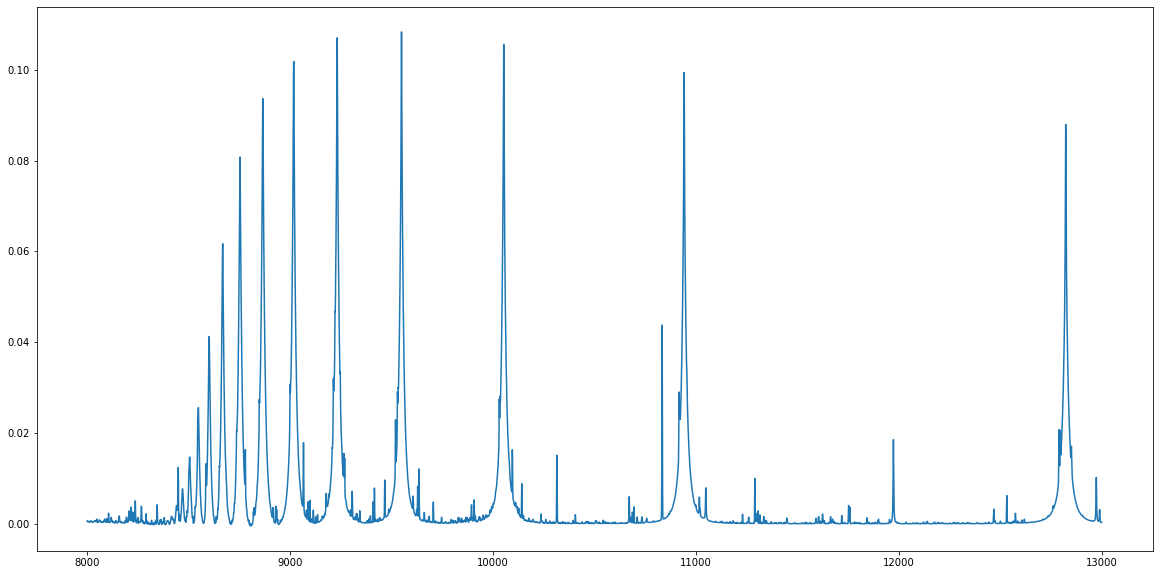

In [31]:
plt.figure(figsize=(20,10))
plt.plot(pH.wave, VV[:,0])

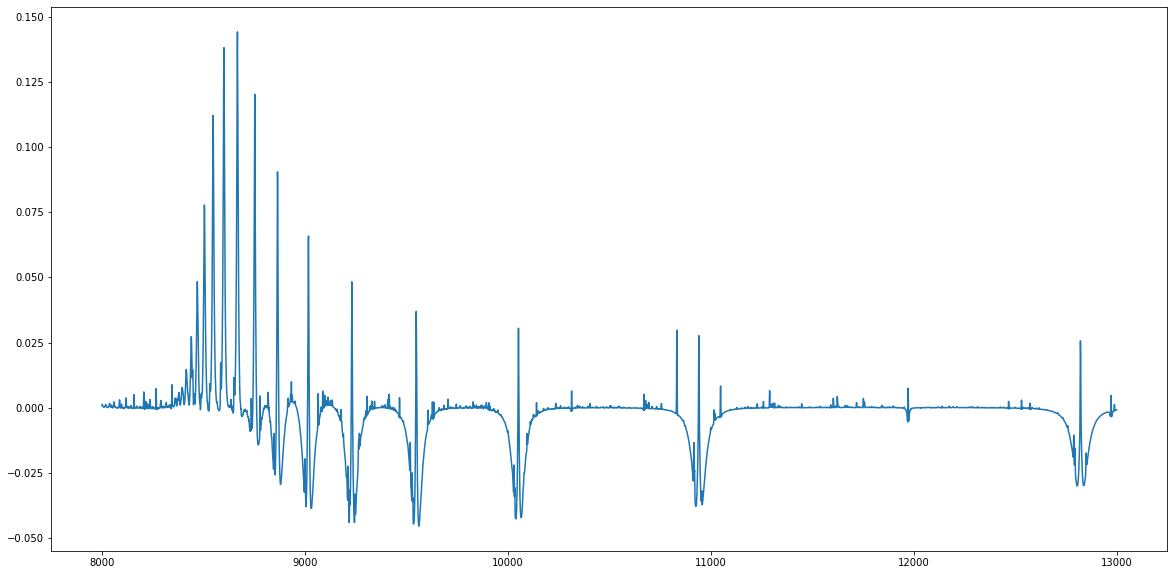

In [32]:
plt.figure(figsize=(20,10))
plt.plot(pH.wave, VV[:,1])

In [37]:
df_para = pd.read_csv("/home/swei20/AE/data/para.csv")

In [118]:
df_paraL = df_para[(df_para["Teff"] > 3000)& (df_para["Teff"] <= 7000)]

In [145]:
a = df_paraL[['FeH', 'Teff', 'Logg', 'C_M', 'O_M']]

In [148]:
a.index = range(a.shape[0])


In [149]:
a

,FeH,Teff,Logg,C_M,O_M
0,-2.50,3500.0,0.0,-0.50,-0.25
1,-2.50,3500.0,0.0,-0.50,0.00
2,-2.50,3500.0,0.0,-0.50,0.25
3,-2.50,3500.0,0.0,-0.50,0.50
4,-2.50,3500.0,0.0,-0.25,-0.25
...,...,...,...,...,...
43467,0.75,7000.0,5.0,0.25,0.50
43468,0.75,7000.0,5.0,0.50,-0.25
43469,0.75,7000.0,5.0,0.50,0.00
43470,0.75,7000.0,5.0,0.50,0.25


In [146]:
a

,FeH,Teff,Logg,C_M,O_M
0,-2.50,3500.0,0.0,-0.50,-0.25
1,-2.50,3500.0,0.0,-0.50,0.00
2,-2.50,3500.0,0.0,-0.50,0.25
3,-2.50,3500.0,0.0,-0.50,0.50
4,-2.50,3500.0,0.0,-0.25,-0.25
...,...,...,...,...,...
111054,0.75,7000.0,5.0,0.25,0.50
111055,0.75,7000.0,5.0,0.50,-0.25
111056,0.75,7000.0,5.0,0.50,0.00
111057,0.75,7000.0,5.0,0.50,0.25


In [101]:
df_paraL.index = np.arang

,Fe,Te,Lg,CM,OM,FeH,Teff,Logg,C_M,O_M,p1,p2,p3
0,0,0,0,1,0,-2.50,3500.0,0.0,-0.50,-0.25,-30.338438,2.195663,-5.001692
1,0,0,0,1,1,-2.50,3500.0,0.0,-0.50,0.00,-32.764657,2.281114,-5.436010
2,0,0,0,1,2,-2.50,3500.0,0.0,-0.50,0.25,-35.870359,2.474615,-5.925817
3,0,0,0,1,3,-2.50,3500.0,0.0,-0.50,0.50,-39.618324,2.673175,-6.343921
4,0,0,0,2,0,-2.50,3500.0,0.0,-0.25,-0.25,-31.107103,2.169074,-5.149027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112894,13,26,10,4,3,0.75,10000.0,5.0,0.25,0.50,-12.313964,-16.070542,2.032233
112895,13,26,10,5,0,0.75,10000.0,5.0,0.50,-0.25,-11.102344,-15.524522,2.287692
112896,13,26,10,5,1,0.75,10000.0,5.0,0.50,0.00,-11.390876,-15.646540,2.230743
112897,13,26,10,5,2,0.75,10000.0,5.0,0.50,0.25,-11.844849,-15.853417,2.184931


In [43]:
df_para0 = df_para[(df_para["Teff"] > 12000)]

In [58]:
df_para0["idx"] = np.arange(len(df_para0))

<ipython-input-58-9bc507431bc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_para0["idx"] = np.arange(len(df_para0))


In [64]:
df_para0.columns

Index(['Fe', 'Te', 'Lg', 'CM', 'OM', 'FeH', 'Teff', 'Logg', 'C_M', 'O_M', 'p1',
       'p2', 'p3', 'idx'],
      dtype='object')

In [66]:
df_para00 = df_para0[['FeH', 'Teff', 'Logg', 'C_M', 'O_M']]

In [68]:
df_para00.index = np.arange(len(df_para00))

In [69]:
df_para00

,FeH,Teff,Logg,C_M,O_M
0,-2.50,12500.0,3.0,-0.50,-0.25
1,-2.50,12500.0,3.0,-0.50,0.00
2,-2.50,12500.0,3.0,-0.50,0.25
3,-2.50,12500.0,3.0,-0.50,0.50
4,-2.50,12500.0,3.0,-0.25,-0.25
...,...,...,...,...,...
31698,0.75,30000.0,5.0,0.25,0.50
31699,0.75,30000.0,5.0,0.50,-0.25
31700,0.75,30000.0,5.0,0.50,0.00
31701,0.75,30000.0,5.0,0.50,0.25


In [48]:
pH.X[2].shape

(31703, 4855)

In [46]:
VV.shape

(4855, 32)

In [51]:
U = pH.X[2].dot(VV)

In [52]:
U.shape

(31703, 32)

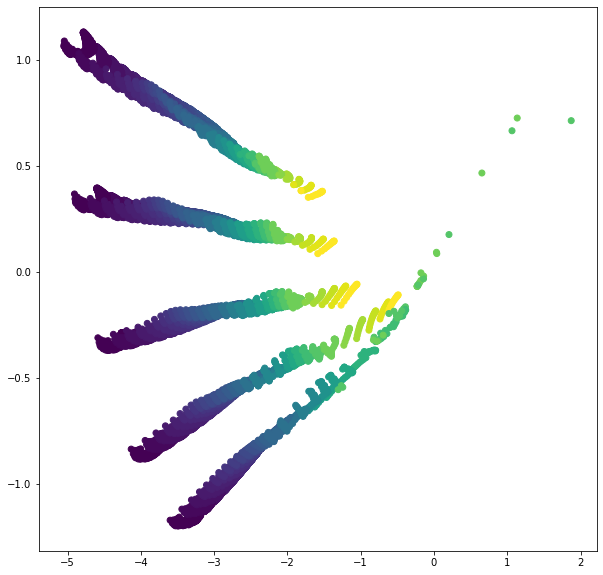

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(U[:,0], U[:,1], c=df_para0["Teff"],)

In [60]:
p1 = np.where(U[:,0]>0)[0]

In [73]:
p1

array([29026, 31509, 31511, 31517, 31607, 31608, 31614])

In [75]:
df_para00.iloc[p1]

,FeH,Teff,Logg,C_M,O_M
29026,0.50,30000.0,3.0,0.0,0.00
31509,0.75,29000.0,3.0,-0.5,0.00
31511,0.75,29000.0,3.0,-0.5,0.50
31517,0.75,29000.0,3.0,0.0,0.00
31607,0.75,30000.0,3.0,-0.5,-0.25
31608,0.75,30000.0,3.0,-0.5,0.00
31614,0.75,30000.0,3.0,0.0,-0.25


In [ ]:
loggg = df_para0["Logg"].values

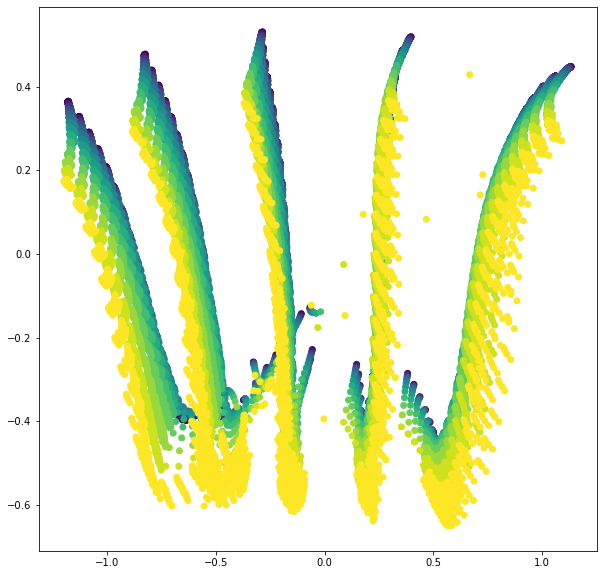

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(U[:,1], U[:,2], c=df_para0["FeH"])

In [85]:
p2 = np.where((U[:,0] < 0.6)&(U[:,1] > 0.4))[0]

In [87]:
df_p2 = df_para00.iloc[p2]

In [91]:
df_p2[df_p2["Logg"] !=3.0]

,FeH,Teff,Logg,C_M,O_M
80,-2.50,12500.0,5.0,-0.50,-0.25
81,-2.50,12500.0,5.0,-0.50,0.00
82,-2.50,12500.0,5.0,-0.50,0.25
83,-2.50,12500.0,5.0,-0.50,0.50
84,-2.50,12500.0,5.0,-0.25,-0.25
...,...,...,...,...,...
31698,0.75,30000.0,5.0,0.25,0.50
31699,0.75,30000.0,5.0,0.50,-0.25
31700,0.75,30000.0,5.0,0.50,0.00
31701,0.75,30000.0,5.0,0.50,0.25


In [89]:
df_p2[df_p2["Logg"] ==3.0]

,FeH,Teff,Logg,C_M,O_M
31314,0.75,27000.0,3.0,-0.25,0.25
31423,0.75,28000.0,3.0,0.25,0.50
31508,0.75,29000.0,3.0,-0.50,-0.25
31513,0.75,29000.0,3.0,-0.25,0.00
31520,0.75,29000.0,3.0,0.25,-0.25
31523,0.75,29000.0,3.0,0.50,-0.25
31609,0.75,30000.0,3.0,-0.50,0.50
31612,0.75,30000.0,3.0,-0.25,0.25
31613,0.75,30000.0,3.0,-0.25,0.50
31616,0.75,30000.0,3.0,0.00,0.50


In [165]:
dfpc = pd.DataFrame(data = U[:,:5], columns = [f"p{i}" for i in range(5)])

In [166]:
dfpc['Logg'] = df_

,p0,p1,p2,p3,p4
0,-3.287712,-1.181577,0.364390,0.116572,-0.297611
1,-3.288373,-1.181885,0.364276,0.115028,-0.297428
2,-3.288661,-1.181780,0.363718,0.112194,-0.296961
3,-3.289610,-1.181692,0.363532,0.107753,-0.296132
4,-3.286939,-1.181346,0.363993,0.116303,-0.297388
...,...,...,...,...,...
31698,-2.276824,0.517802,-0.584400,-0.326180,-0.236402
31699,-2.216501,0.454509,-0.541316,-0.107665,-0.207667
31700,-2.229201,0.465588,-0.554690,-0.161310,-0.216801
31701,-2.245916,0.481806,-0.571243,-0.235257,-0.227728


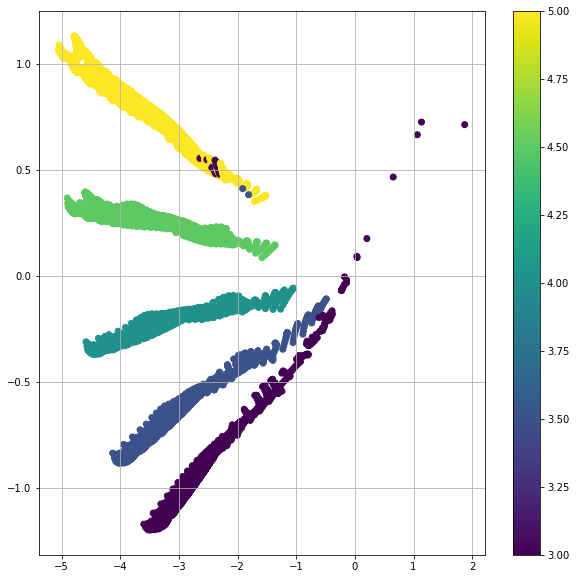

In [141]:
plt.figure(figsize=(10,10))
plt.scatter(U[:,0], U[:,1], c=df_para0["Logg"])
plt.grid()
plt.colorbar()
# plt.legend()

In [90]:
df_para

,Fe,Te,Lg,CM,OM,FeH,Teff,Logg,C_M,O_M,p1,p2,p3
0,0,0,0,1,0,-2.50,3500.0,0.0,-0.50,-0.25,-30.338438,2.195663,-5.001692
1,0,0,0,1,1,-2.50,3500.0,0.0,-0.50,0.00,-32.764657,2.281114,-5.436010
2,0,0,0,1,2,-2.50,3500.0,0.0,-0.50,0.25,-35.870359,2.474615,-5.925817
3,0,0,0,1,3,-2.50,3500.0,0.0,-0.50,0.50,-39.618324,2.673175,-6.343921
4,0,0,0,2,0,-2.50,3500.0,0.0,-0.25,-0.25,-31.107103,2.169074,-5.149027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116609,13,60,10,4,3,0.75,30000.0,5.0,0.25,0.50,-4.104047,-5.056857,1.422326
116610,13,60,10,5,0,0.75,30000.0,5.0,0.50,-0.25,-3.438580,-4.956540,1.236275
116611,13,60,10,5,1,0.75,30000.0,5.0,0.50,0.00,-3.618532,-4.968871,1.290465
116612,13,60,10,5,2,0.75,30000.0,5.0,0.50,0.25,-3.835860,-4.973086,1.356232


In [150]:
pp = PCA(flux, mask)

AttributeError: 'PCA' object has no attribute 'W'

In [188]:
df_para_all = pd.read_csv("/home/swei20/AE/data/para.csv")
df_para = df_para_all[['FeH', 'Teff', 'Logg', 'C_M', 'O_M']]

In [200]:
df_para["T3"] = ""
df_para["F3"] = ""
df_para["L3"] = ""


In [207]:
self.Ts = [[3000, 7000], [7000, 12000], [12000, 30000]]

In [208]:
for ii, ts in enumerate(self.Ts):
    idx = df_para[(df_para["Teff"] > ts[0])& (df_para["Teff"] <= ts[1])].index
    df_para["T3"][idx] = self.Tname[ii]

In [205]:
self.Tname[0]

'LOW'

In [209]:
df_para

,FeH,Teff,Logg,C_M,O_M,T3,F3,L3
0,-2.50,3500.0,0.0,-0.50,-0.25,LOW,,
1,-2.50,3500.0,0.0,-0.50,0.00,LOW,,
2,-2.50,3500.0,0.0,-0.50,0.25,LOW,,
3,-2.50,3500.0,0.0,-0.50,0.50,LOW,,
4,-2.50,3500.0,0.0,-0.25,-0.25,LOW,,
...,...,...,...,...,...,...,...,...
116609,0.75,30000.0,5.0,0.25,0.50,HIGH,,
116610,0.75,30000.0,5.0,0.50,-0.25,HIGH,,
116611,0.75,30000.0,5.0,0.50,0.00,HIGH,,
116612,0.75,30000.0,5.0,0.50,0.25,HIGH,,


In [198]:
df_para[(df_para["Teff"] > ts[0])& (df_para["Teff"] <= ts[1])]["TT"] = 1

In [199]:
df_para

,FeH,Teff,Logg,C_M,O_M
0,-2.50,3500.0,0.0,-0.50,-0.25
1,-2.50,3500.0,0.0,-0.50,0.00
2,-2.50,3500.0,0.0,-0.50,0.25
3,-2.50,3500.0,0.0,-0.50,0.50
4,-2.50,3500.0,0.0,-0.25,-0.25
...,...,...,...,...,...
116609,0.75,30000.0,5.0,0.25,0.50
116610,0.75,30000.0,5.0,0.50,-0.25
116611,0.75,30000.0,5.0,0.50,0.00
116612,0.75,30000.0,5.0,0.50,0.25


In [191]:
self = PCA(flux, mask, Wcut=True)

3it [00:08,  2.91s/it]


In [177]:
self.df_vs[0]

,FeH,Teff,Logg,C_M,O_M,p0,p1,p2,p3,p4
0,-2.50,3500.0,0.0,-0.50,-0.25,-0.897671,-0.903956,-0.596501,-0.124915,-0.591369
1,-2.50,3500.0,0.0,-0.50,0.00,-0.977690,-1.031830,-0.672070,-0.079827,-0.631527
2,-2.50,3500.0,0.0,-0.50,0.25,-1.080063,-1.158755,-0.749719,-0.042487,-0.662613
3,-2.50,3500.0,0.0,-0.50,0.50,-1.210482,-1.301181,-0.812900,-0.006306,-0.679276
4,-2.50,3500.0,0.0,-0.25,-0.25,-0.970414,-0.871322,-0.610479,-0.187428,-0.583024
...,...,...,...,...,...,...,...,...,...,...
21070,0.75,5000.0,5.0,0.25,0.50,-4.748787,-2.670194,-1.564597,0.898723,0.028217
21071,0.75,5000.0,5.0,0.50,-0.25,-12.821620,1.820256,-0.766660,-0.581665,0.217103
21072,0.75,5000.0,5.0,0.50,0.00,-11.162142,0.944424,-1.170703,-0.699547,0.296811
21073,0.75,5000.0,5.0,0.50,0.25,-7.251240,-1.265829,-1.622807,-0.086270,0.088283


In [178]:
import seaborn as sns

In [ ]:
fg=sns.FacetGrid(self.df_vs[2], row="Teff")
fg.map_dataframe(sns.scatterplot, "p0", "p1", hue="Teff", palette="Spectral", s=5)

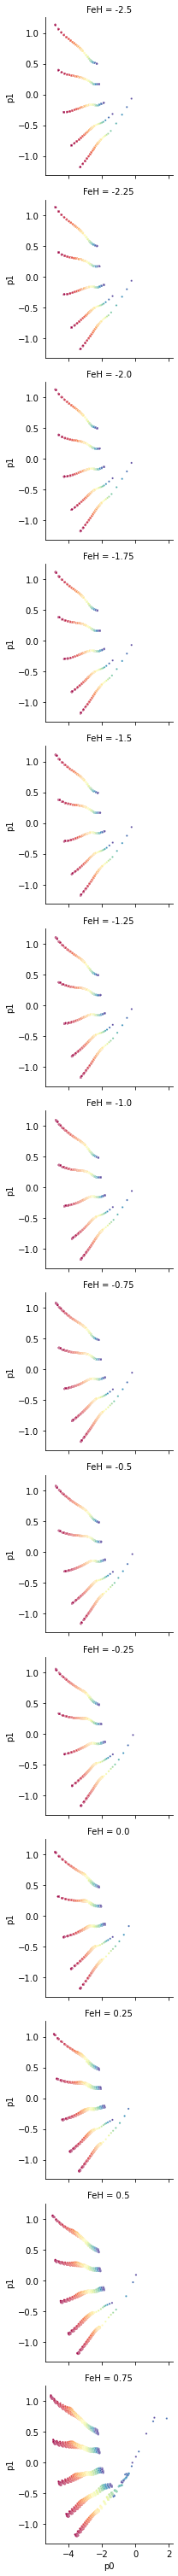

In [187]:
fg=sns.FacetGrid(self.df_vs[2], row="FeH")
fg.map_dataframe(sns.scatterplot, "p0", "p1", hue="Teff", palette="Spectral", s=5)

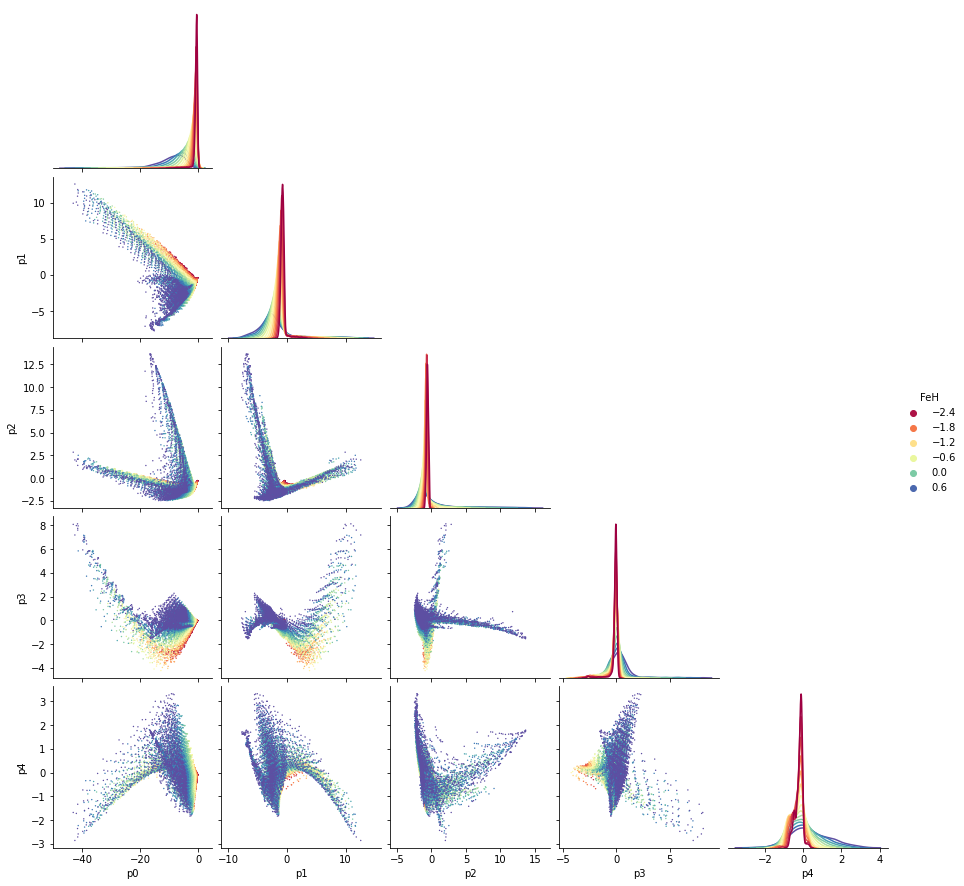

In [184]:
sns.pairplot(
    self.df_vs[0],
    x_vars=[f"p{i}" for i in range(5)],
    y_vars=[f"p{i}" for i in range(5)],
    hue="FeH",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="Spectral",
    corner=True
)

In [172]:
p.paras

{}

AttributeError: 'PCA' object has no attribute 'plot_vs'

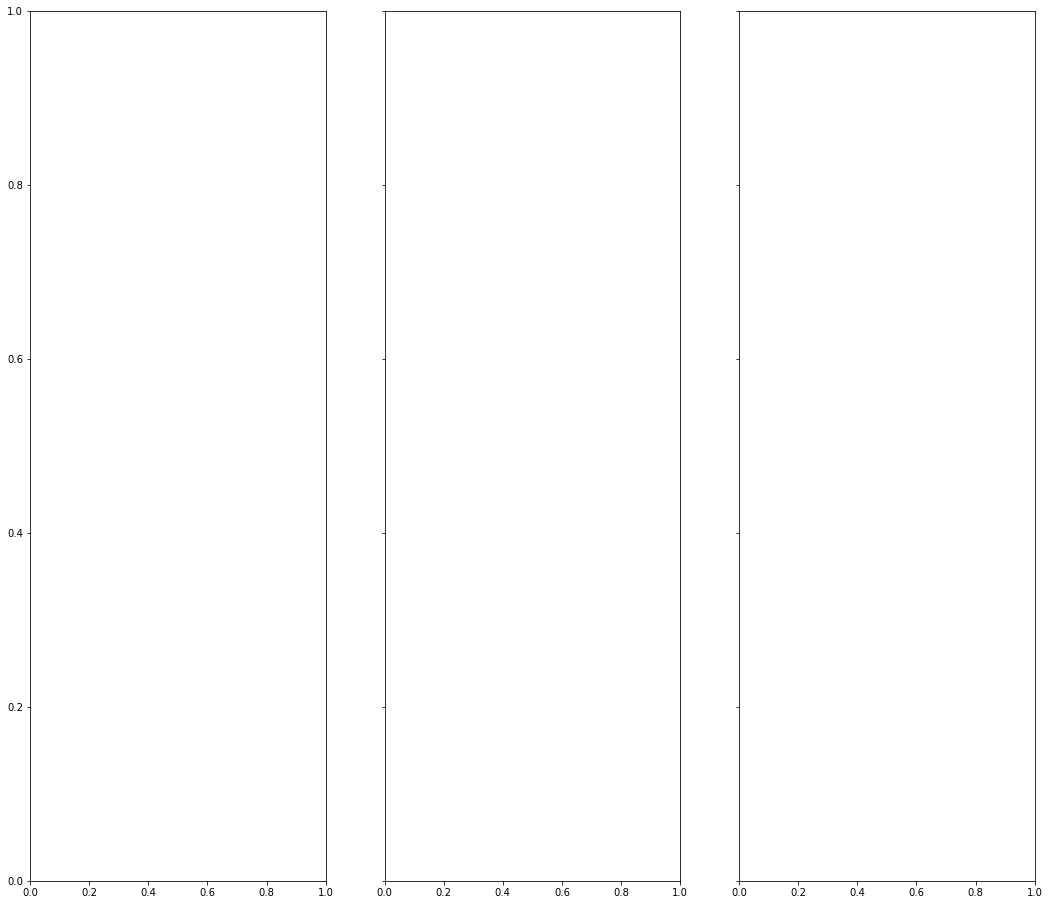

In [169]:
p.plot_all_us(step=0.01, lb=8000, ub=13000, n_eigv=4)